X.shape: (26, 2)


/Users/chenjunyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


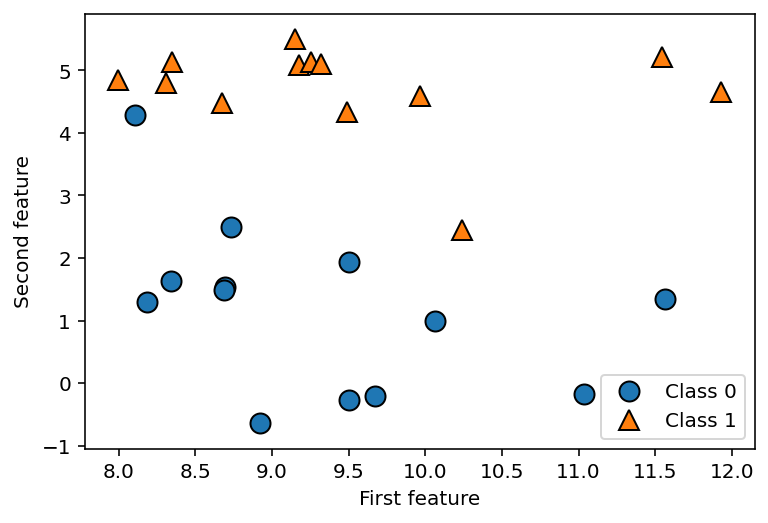

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import mglearn

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 生成数据集
X, y = mglearn.datasets.make_forge()
# 数据集绘图
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 
plt.legend(["Class 0", "Class 1"], loc=4) 
plt.xlabel("First feature") 
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

Text(0, 0.5, 'Target')

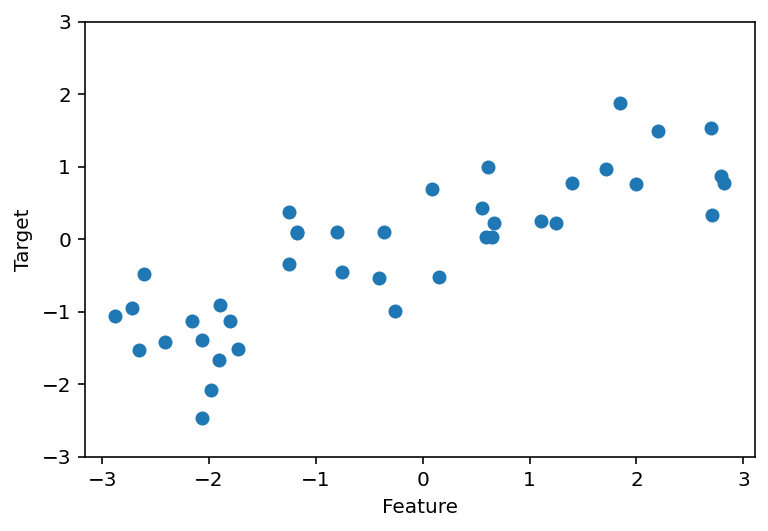

In [2]:
X, y = mglearn.datasets.make_wave(n_samples=40) 
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [3]:
#乳腺癌数据集
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
print("shape of cancer data:{}".format(cancer.data.shape))

shape of cancer data:(569, 30)


In [5]:
print("Sample counts per class:\n{}".format(
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [6]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))
X, y = mglearn.datasets.load_extended_boston() 
print("X.shape: {}".format(X.shape))


Data shape: (506, 13)
X.shape: (506, 104)


/Users/chenjunyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


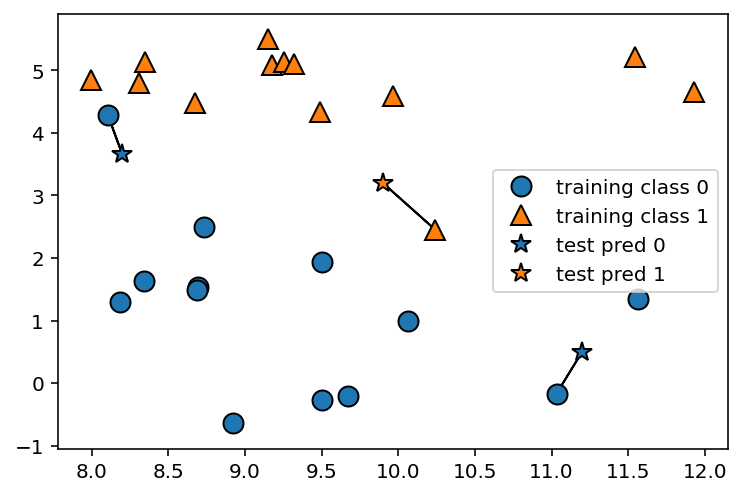

In [7]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/Users/chenjunyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


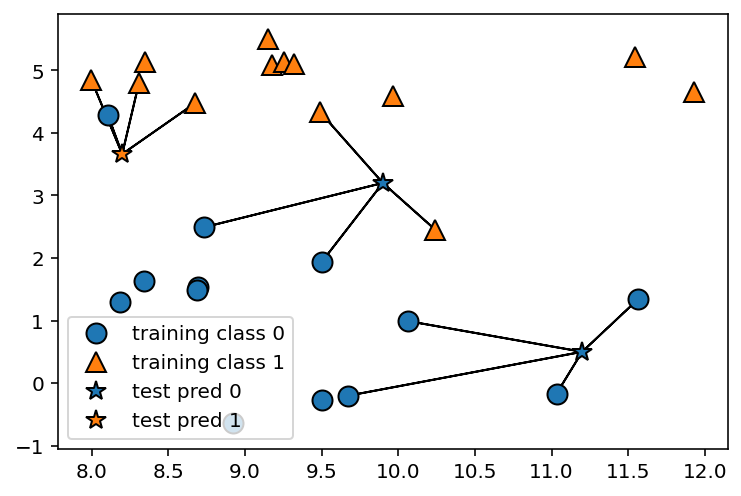

In [8]:
mglearn.plots.plot_knn_classification(n_neighbors=4)

In [9]:
#通过scikit_learn学习k近邻算法
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X,y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train)
print("Test set predictions: {}".format(clf.predict(X_test)))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

/Users/chenjunyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


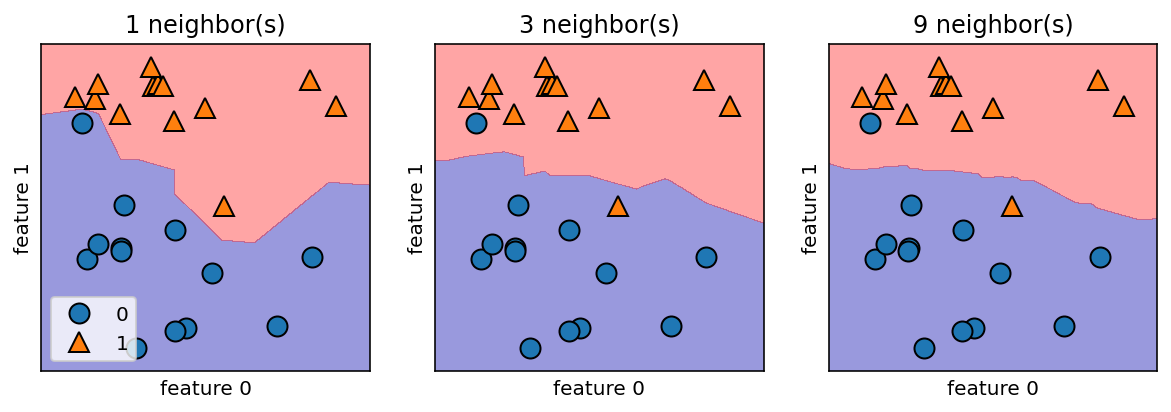

In [10]:
#决策边界
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit方法返回对象本身，所以我们可以将实例化和拟合放在一行代码中
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y) 
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4) 
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

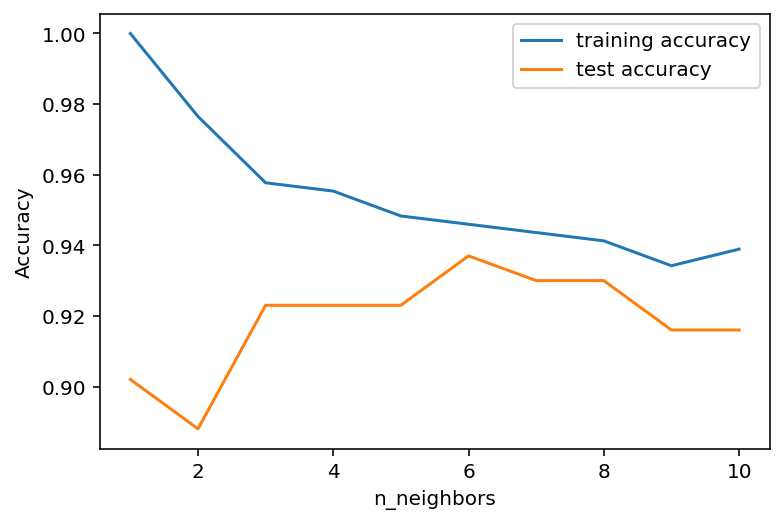

In [11]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = [] 
test_accuracy = []
# n_neighbors取值从1到10 
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # 构建模型
    clf = KNeighborsClassifier(n_neighbors=n_neighbors) 
    clf.fit(X_train, y_train)
    # 记录训练集精度 
    training_accuracy.append(clf.score(X_train, y_train)) # 记录泛化精度
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy") 
plt.plot(neighbors_settings, test_accuracy, label="test accuracy") 
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

#### 下面用make_wave演示k近邻回归算法 KNeighborsRegressor

In [12]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples=40)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


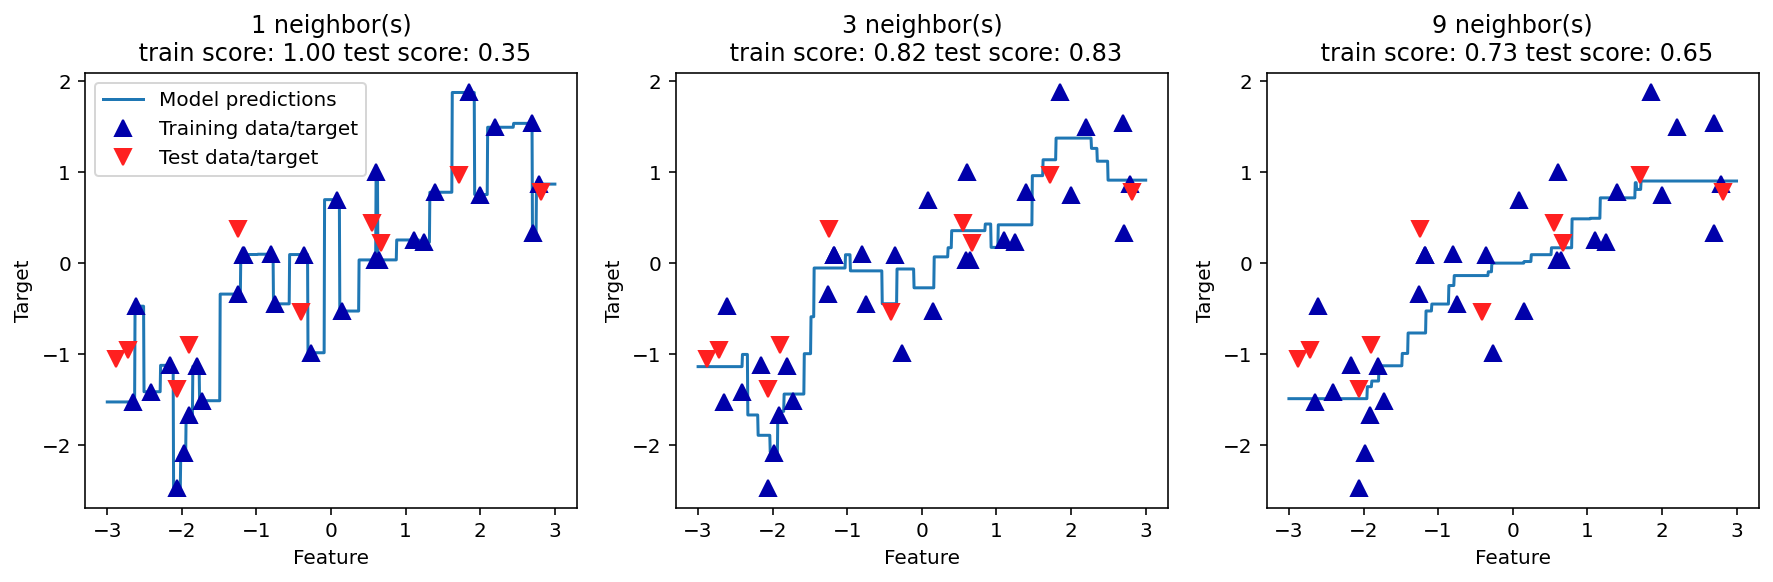

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
#创建1000个数据点，在（-3，3）间均匀分布
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1, 3, 9], axes):
# 利用1个、3个或9个邻居分别进行预测
    reg = KNeighborsRegressor(n_neighbors=n_neighbors) 
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8) 
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train),reg.score(X_test, y_test))) 
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")
 